# Deep Learning Notebook 1 - Network Basics

## Perceptron

1. Perceptrons are simple ANN structures which is based on a threshold logic unit (TLU) or also known as a linear threshold unit (LTU).
2. Instead of the classical ANNs in which we do logical operation, In TLU we have number as input/output and weights. TLU computes a weighted sum of the input and applies a step function (like the one I saw in differential equations) 


$$h_w\left(x\right)=step\left(z\right),\:where\:z=X^TW$$


3. There are different step function [link](https://en.wikipedia.org/wiki/Step_function). For perceptrons, people tend to use heavyside step function.

$$
  H(x) = \cases{        0       & if $z\le 0$ \cr
                        1   & if $z\ge 0$ \cr}
$$

4. We can use TLU for binary classification. For doing that, we are supposed to assign the instance to positive class if the weightted sum of input exceeds a threshold. However, this is not like logitic regression because in logistic regression the output is class probability. Whereas, in TLU, we use a hard threshold (like the one in SVM perhaps hard margin classifier).


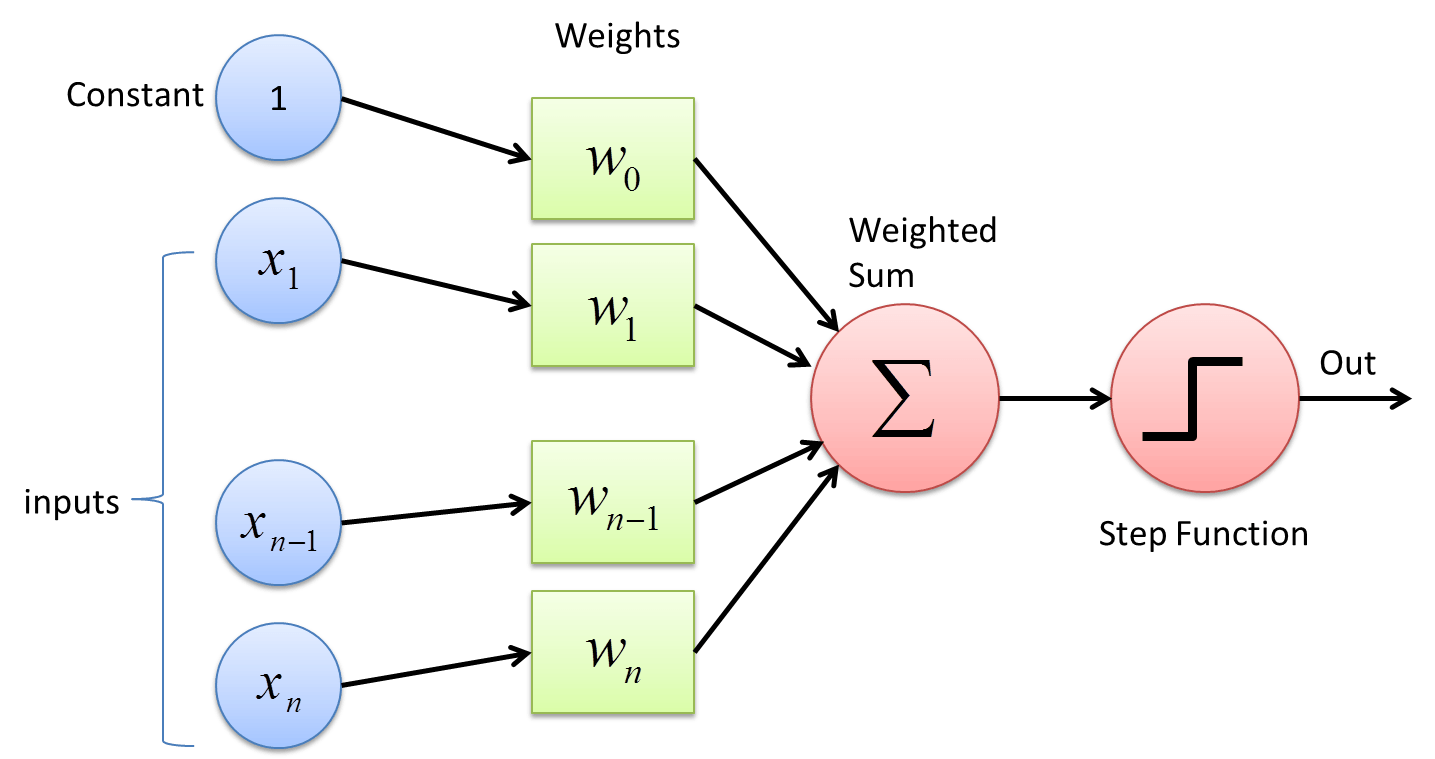

5. When all neurons of one layer is connected to every neuron in the previous layer, we call that layer a fully connected layer or dense layer (well that shows where `Dense()` comes from). In addition to input neurons which outputs directly what their input is, we also have bias neurons. By adding different output layers we can use perceptron for multiclass classification.
6. We can calculate output of the dense layer with the equation $$h_{W,b}\left(X\right)=\phi \left(XW+b\right)$$ 
7. Even though I find some good representation of the weight updating in perceptron, I couldn't find the right mathematical representation that works best for me until I read Hands on Hands ML. I use the version in that book here since it represents the idea very well. For updating weights we can use the following rule $$w_{i,j}^{\left(next\:step\right)}=w_{i,j}+\eta \left(y_j-y'_j\right)x_i$$ The Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have con‐tributed to the correct prediction. Sebastian Raschka has a very well designed post about perceptron in which you can also find about this update rule (This guy know his stuff) [link](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html)
8. The perceptron learning algorithm actually inspired from Hebbian Learning.
9. For every output we have a linear decision boundary, in other words, perceptrons cannot classify non-linear, complex paterns. Moreover there is theorem called Perceptron Convergence Theorem which states that if the instances are linearly seperable the perceptron will converge to a solution. 
10. The more I read about the perceptron the more I find it similar to SVM.
11. The problem of Perceptron is, as it is also the problem of all linear models, it cannot solve the XOR classification. To overcome this problem we can use Multilayer Perceptron (MLP). In multilayer perceptron models we have three basic layer class. The first one is the input layer(passthrough), just like the one in classical Perceptron model. Unlike Perceptron model, In MLP we have TLUs called hidden layers between the input layer and output layer. These hidden layers define the deepness of our algorithm, when there is a deep stack of hidden layers we call it deep neural network (DNN), that is actually where the name deep learning comes from. And finally, we have a output layer.All the layers are fully connected to each other and we include the bias term into every layer except the output layer.



That is a very nice summary [link](https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron#:~:text=Perceptron%20Learning%20Rule%20states%20that,a%20neuron%20fires%20or%20not.) Also check out this one [link](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)

## Classification with Perceptron for Stroke Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns

data=pd.read_csv("healthcare-dataset-stroke-data.csv")
X=data.loc[:,["hypertension","heart_disease"]]
Y=data.loc[:,["stroke"]]



imputer = SimpleImputer(strategy="median")
X=imputer.fit_transform(X)



perceptron_mdl = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_mdl.fit(X, Y)
y_predict= perceptron_mdl.predict(X)

accuracy_score(Y,y_predict)


C:\Users\gorke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9512720156555773

Well %95 acuracy is actually pretty good but this metric is very tricky when we have an inbalanced target variable. I remember that there was a big class imbalance in this dataset as well. Let's look at the countplot.

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

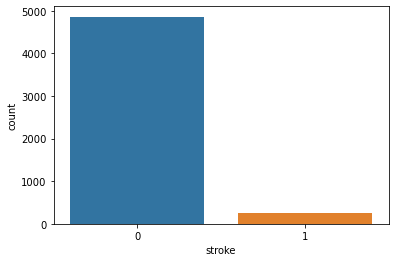

In [2]:
sns.countplot(Y["stroke"])

As I guessed probably the model does not perform well but it's not important since I won't use this perceptron models much.

Note: Scikit's Perceptron class is the same as SGDClassifier if we use the parameters as the following `loss="perceptron"`, `eta=1`, `penality=none`, `lr=constant`

**Important Papers**

1. Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.
2. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning representations by back-propagating errors. nature, 323(6088), 533-536.

## Backpropagation and Activation Function

The algorithm:

1. In each epoch, we feed some number of instances (generally 32) into the algorithm.
2. The input layer send the every mini-batch to hidden layers. Each hidden layer computes an output and send it to following hidden layer.
3. Finally we reach to output layer and the so called "forward pass" is done. We calculate the output error and thanks to the chain rule we also calculate how much each connection contributed to that error.
4. And in the backpropogation part the algorithm calculates error gradient of each weight in the connections by using the chain rule. Then by using gradient descent the algorithm tunes the weights by using the error gradient it calculated in the backpropogation phase.

3D1Brown has a very good visualizations of this steps [Video1](https://www.youtube.com/watch?v=Ilg3gGewQ5U) [Video2](https://www.youtube.com/watch?v=tIeHLnjs5U8), I also like Statquest's videos about backprop but I think 3D1Brown has a better explanation for this algorithm.

I also really like Ritvikmath's video for backprop algorithm which can be accessed by [Video3](https://www.youtube.com/watch?v=kbGu60QBx2o&t=10s)

Also Gilbert Strang has an unique lecture about Backpropagation [Video4](https://www.youtube.com/watch?v=lZrIPRnoGQQ)


5. In addition, we initialize the weights randomly (I omit other initializations for now) If we don't, all the weights in a given layer will be the same and backpropagation will effect all the weights in the same way since the error gradients are the same for every connection. By randomly initializing we break the symmetry.
6. We use different activation function because the step function contains flat segments which has derivation equals to 0, so there isn't any gradient to work with. Even though sigmoid function is good for this training procedures (or better compared to unit step function) it has some segments where we have very little gradients. That's why, It's generally preferable to use ReLU instead of sigmoid.



In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

(-10.0, 10.0, -1.5, 1.5)

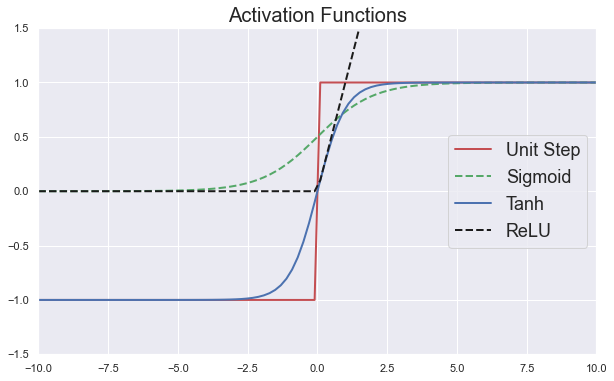

In [5]:
x = np.linspace(-10, 10, 100)
sns.set()
plt.figure(figsize=(10,6))
plt.plot(x, np.sign(x), "r-", linewidth=2, label="Unit Step")
plt.plot(x, sigmoid(x), "g--", linewidth=2, label="Sigmoid")
plt.plot(x, np.tanh(x), "b-", linewidth=2, label="Tanh")
plt.plot(x, relu(x), "k--", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=18)
plt.title("Activation Functions", fontsize=20)
plt.axis([-10, 10, -1.5, 1.5])

## Cat vs Non-Cat Implementing Perceptron Model as Logistic Regression

Okay now, for those who are reading this on github I'd like to add a note here: The code below is actually a part of assignment that I finished in order to complete Andrew NG's deep learning specialization. I like combining theory and practice, that's why, I want to contruct a perceptron model from the beginning here and add this code of mine while doing the assignment from the course. I didn't code every part of this code, instead, I completed the missing parts which the general case in all of the assignments. In fact I would use this example on another problem (here and also in the course we tried to predict cat vs non-cat classification) but the datasets I found such cat-vs-dog dataset, were a bit big and I didn't want to spend much time on it.

I will add here the `load_dataset()` function that is used in the course.

In [6]:
import h5py
import numpy as np
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We loaded our data. Let's also show one picture from the dataset. One thing I want to show here is that the datasets doesn't actually contains the images but the pixel values that every images is composed of. We can use the `imshow()` function to show a picture by using pixel values.

In [13]:
index =3
train_set_x_orig[index]

array([[[  1,  22,   2],
        [  1,  14,   2],
        [  1,  13,   1],
        ...,
        [  2,  28,   1],
        [  8,  68,   2],
        [ 13,  93,   2]],

       [[  1,  23,   2],
        [  1,  15,   2],
        [  2,  18,   2],
        ...,
        [  1,  22,   1],
        [  2,  38,   2],
        [  2,  52,   2]],

       [[  1,  34,   3],
        [  1,  24,   2],
        [  1,  14,   1],
        ...,
        [  6,  47,   2],
        [  4,  33,   1],
        [  1,  20,   2]],

       ...,

       [[  9, 107,  38],
        [ 26, 133,  76],
        [ 23, 129,  70],
        ...,
        [ 35,  96,  60],
        [ 18,  70,  33],
        [  3,  39,   7]],

       [[  3,  92,  12],
        [ 17, 120,  60],
        [ 26, 131,  74],
        ...,
        [  6,  56,  11],
        [  5,  49,   8],
        [  3,  44,   5]],

       [[  2,  87,   4],
        [  8, 104,  33],
        [ 24, 130,  77],
        ...,
        [ 29,  88,  50],
        [ 14,  61,  26],
        [  2,  59,   2]]

y = 0, it's a 'non-cat' picture.


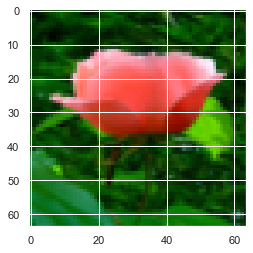

In [14]:
plt.imshow(train_set_x_orig[3])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In general deep learning structure, there's often a step that we do which is also known as flattening. Flattening means converting our array into a one dimensional form. Here we need to do this as well.

In [15]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


Here I will standardize the data (the step below isn't actually standardization since we don't use the regular formula but in context of image processing this step is also called standardization. We actually normalize it since the value will be between 0 and 1).

In [16]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
test_set_x[test_set_x>1] # no value more than 1.

array([], dtype=float64)

Okay here things get much more messy. But theorically what I will do is easy, however, implementing from the scretch is a bit hard. Let's recall the Perceptron model image that I showed in the beginning of this notebook. If we change the step function with logistic function and train the network, we actually get a logistic regression model. This model will not be exactly as the logistic regression model since it will not give us the probabilities. For everyone who is interesting in the differences I recommend reading this stackexchange discussion [link](https://stats.stackexchange.com/questions/162257/whats-the-difference-between-logistic-regression-and-perceptron). Moreover, notice that we will not use any hidden layer here since we are using the original perceptron model not MLP.

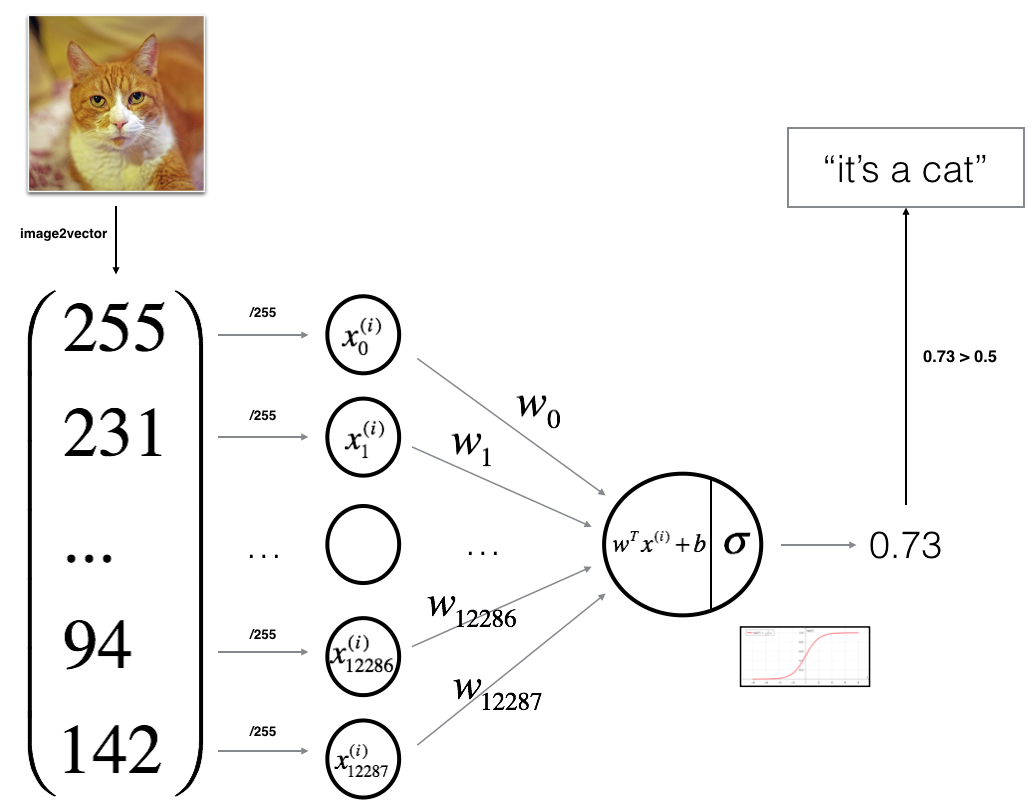

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

### Helper functions

$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Firstly I will implement sigmoid function and initialization. I previously said that initializing all the values zero isn't a good way of initializing, however, in this model I will initialize with zero. This isn't much problem for a simple model like that.

In [17]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [18]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

### Forward and Backward propagation


Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [19]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Implementing Forward Propagation 
    A = sigmoid(np.dot(w.T, X) + b)                                                       # compute activation
    cost = -(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T)) / m 
    
    # Implementing Backpropagation
    dw = np.dot(X,(A-Y).T) / m
    db = np.sum(A - Y) / m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Optimization

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [20]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # updating Weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [21]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    
    # Check whether or not the probability exceeds the threshold (0.5)
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Let's finally combine all of this functions into our `model()` function.

In [22]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    
    # initialize parameters with zeros 
    w, b = initialize(X_train.shape[0])

    # Using Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [23]:
sig_perceptron = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


learning rate is: 1


<ipython-input-19-e71a7f2f6e49>:7: RuntimeWarning: divide by zero encountered in log
  cost = -(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T)) / m
<ipython-input-17-ee44dafff6d9>:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


train accuracy: 79.42583732057416 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 75.11961722488039 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 73.6842105263158 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.64114832535886 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.98564593301435 %
test accuracy: 34.0 %

-------------------------------------------------------



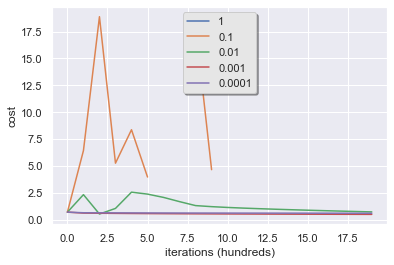

In [24]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Not bad for a model like that.

## Implementing MLP (Shallow Neural Network)

Okay now I will implement the shallow neural network from Andrew NG'S Deep Learning Specialization. The idea here is that implementing a model from the scratch. Afterwards, I will implement a similar model by using Keras library.

Below I will create a planar data by using the function provided in the course. The main idea that we need to observe is the data is cannot be linearly predictable. We previously talked about the problem of linear models which is, they cannot solve problems like XOR. To solve this type of complex problems, we use MLP, in other words, we simple add some hidden layers. Here I will also show how logistic regression performs on that problem as Andrew NG showed in the notebook.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [26]:
X, Y = load_planar_dataset()

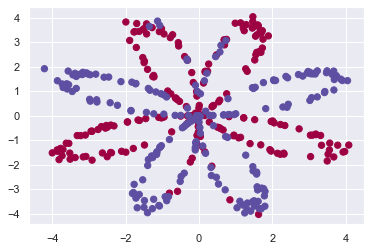

In [27]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [28]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\gorke\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


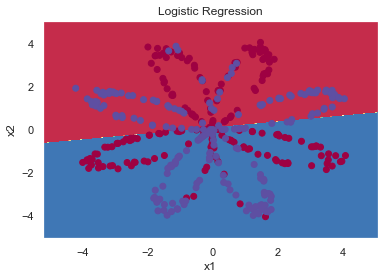

In [29]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

##  Neural Network model

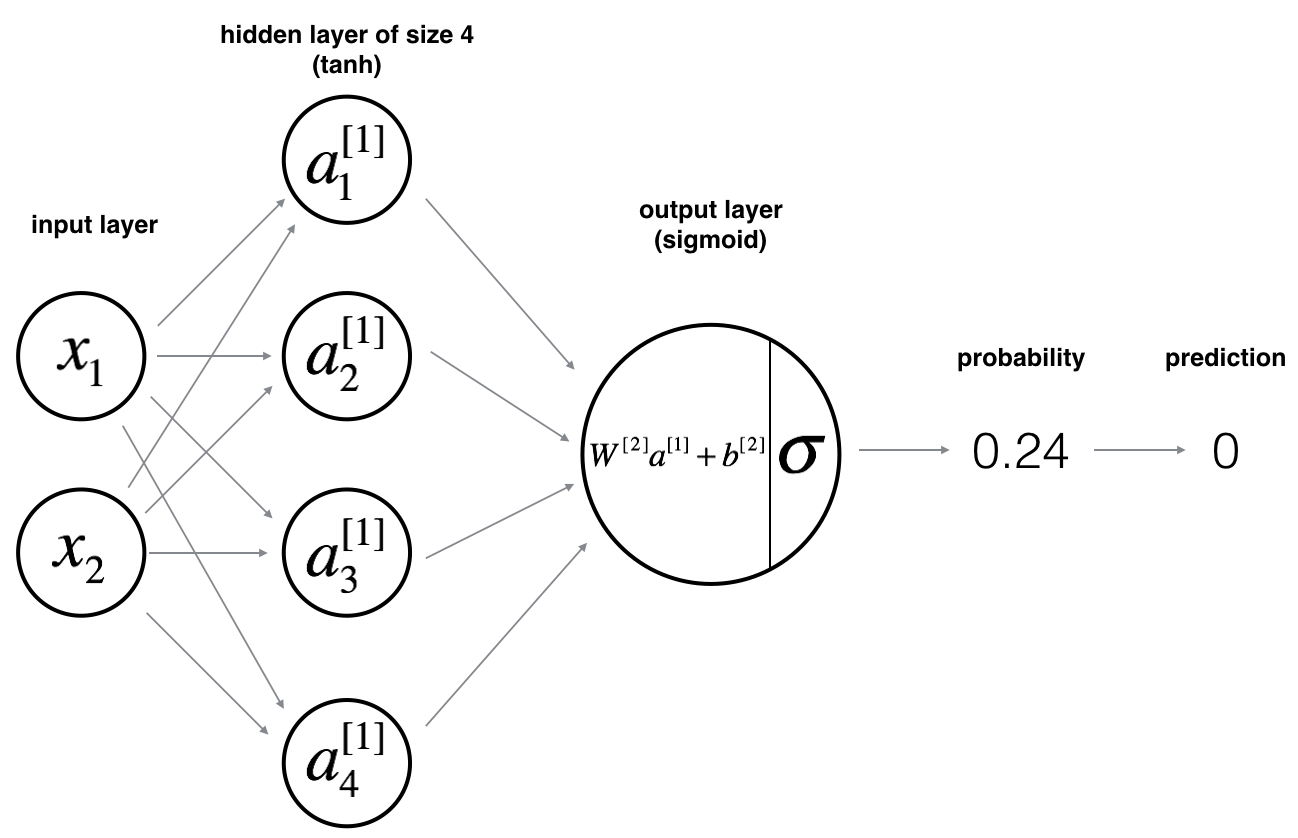



**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

### Defining Structure of Our Deep Learning Model

In [30]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4 #the size of the hidden layer 
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

### Inıtialization

In [31]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Forward and Backward Propagation

In [32]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Now that we have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```



In [33]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  




$$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$$

$$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $$

$$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$$

$$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $$

$$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $$

$$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
     $$ dW1 = \frac{\partial \mathcal{J} }{ \partial W_1 }$$
     $$ db1 = \frac{\partial \mathcal{J} }{ \partial b_1 }$$
     $$ dW2 = \frac{\partial \mathcal{J} }{ \partial W_2 }$$
     $$ db2 = \frac{\partial \mathcal{J} }{ \partial b_2 }$$
    

In [34]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### Optimization

In [35]:
def update_parameters(parameters, grads, learning_rate):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Integrate the parts 

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [36]:
# NN_model
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters


### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [37]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

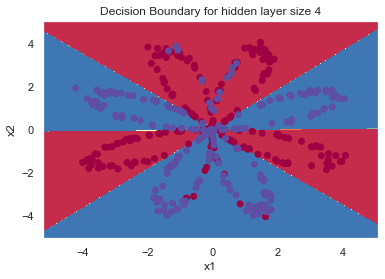

In [38]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

Using just the hidden layer size of 4 we can get a quite good accuracy. But what would have if we increase the size ? Let's find out.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.75 %
Accuracy for 100 hidden units: 91.0 %


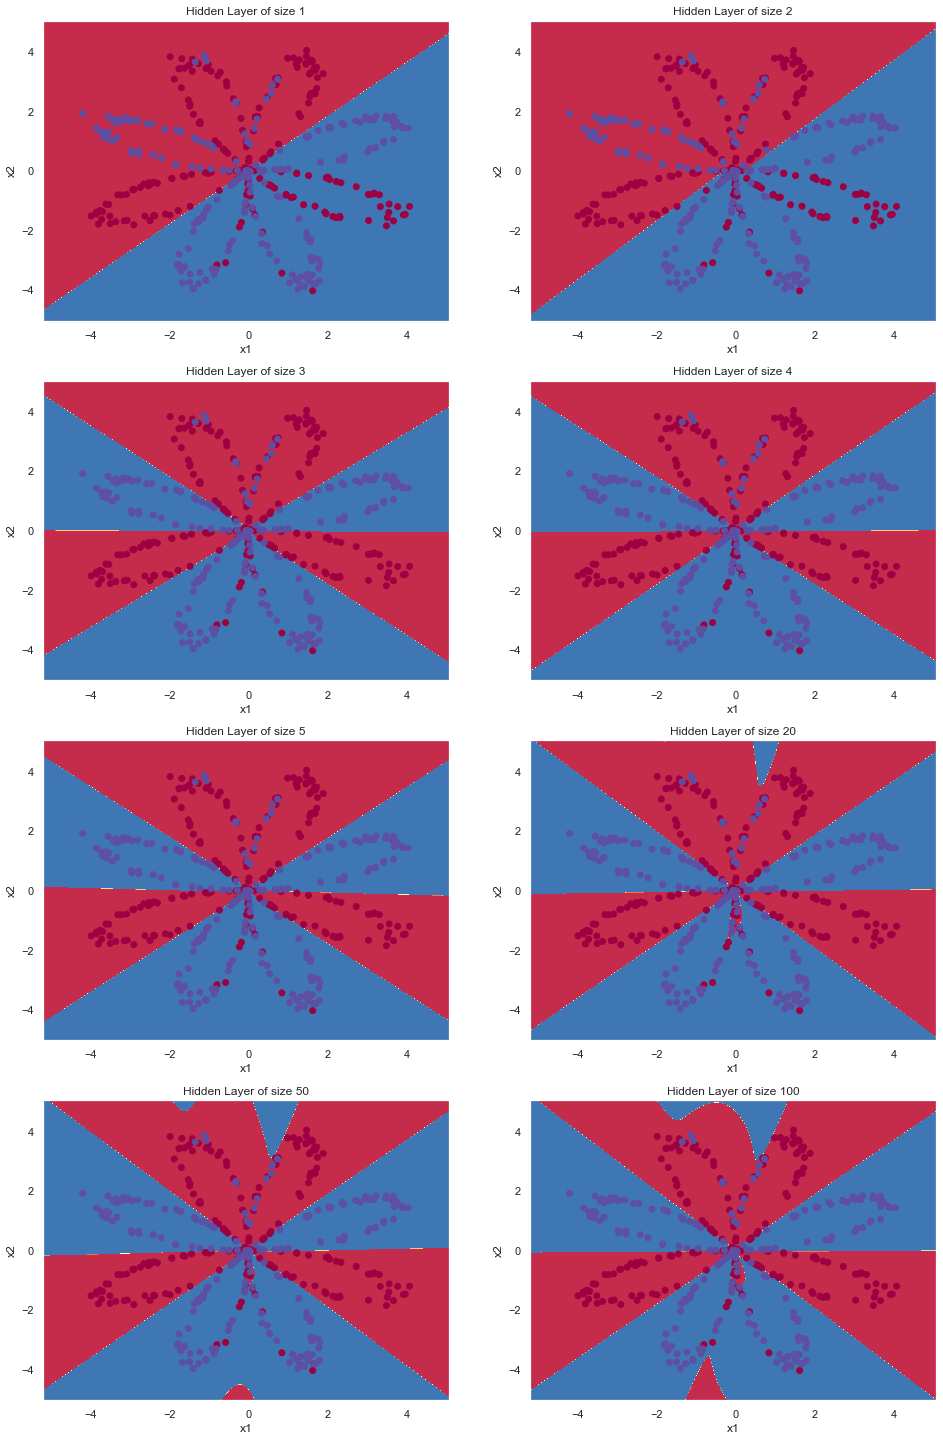

In [39]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

For more about this implementation, there's an very important website to check [link](https://cs231n.github.io/neural-networks-case-study/)

## Implementing a similar Model with Keras

Okay now It's time to implement this algorithm by using Keras. I will have much less work here since Keras already implements lots of the steps. I will create a sequential model with `BinaryCrossentropy` since we only have 0 and 1 in the target variable. Moreover, I will initialize the weights normally which almost the same as we initialized the weights in our implementation (I will also initialize bias as 0). I will use `lr=1.2` since we used this learning rate in our implementation and finally I will have the same activation functions in the layers.

In [47]:
import tensorflow as tf
from tensorflow import keras

In [60]:
#Adding layers
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation="tanh",kernel_initializer='random_normal',bias_initializer='zeros'))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Adding optimizer(I will use SGD)
opt = tf.keras.optimizers.SGD(learning_rate=1.2)

#Let's compile and fit the model
model.compile(loss="BinaryCrossentropy",optimizer=opt, metrics=["accuracy"])
model_fit = model.fit(X.T, Y.T, epochs=500) #500 epoch is good for now.

Epoch 1/500
13/13 [==============================] - 0s 769us/step - loss: 0.7155 - accuracy: 0.4900
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.6125
Epoch 3/500
13/13 [==============================] - 0s 923us/step - loss: 0.5419 - accuracy: 0.7725
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.8075
Epoch 5/500
13/13 [==============================] - 0s 1000us/step - loss: 0.4169 - accuracy: 0.8475
Epoch 6/500
13/13 [==============================] - 0s 846us/step - loss: 0.3983 - accuracy: 0.8400
Epoch 7/500
13/13 [==============================] - 0s 846us/step - loss: 0.3919 - accuracy: 0.8375
Epoch 8/500
13/13 [==============================] - 0s 769us/step - loss: 0.3656 - accuracy: 0.8550
Epoch 9/500
13/13 [==============================] - 0s 769us/step - loss: 0.3650 - accuracy: 0.8400
Epoch 10/500
13/13 [==============================] - 0s 999us/step - loss: 0.3616 - accuracy:

13/13 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.8925
Epoch 163/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.8825
Epoch 164/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.8850
Epoch 165/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2253 - accuracy: 0.9025
Epoch 166/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2267 - accuracy: 0.8825
Epoch 167/500
13/13 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8825
Epoch 168/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.8975
Epoch 169/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.8950
Epoch 170/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8800
Epoch 171/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.8850
Epoc

13/13 [==============================] - 0s 769us/step - loss: 0.2365 - accuracy: 0.8875
Epoch 323/500
13/13 [==============================] - 0s 845us/step - loss: 0.2151 - accuracy: 0.9050
Epoch 324/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.8825
Epoch 325/500
13/13 [==============================] - 0s 1000us/step - loss: 0.2262 - accuracy: 0.8950
Epoch 326/500
13/13 [==============================] - 0s 769us/step - loss: 0.2101 - accuracy: 0.8925
Epoch 327/500
13/13 [==============================] - 0s 1000us/step - loss: 0.2137 - accuracy: 0.8950
Epoch 328/500
13/13 [==============================] - 0s 769us/step - loss: 0.2170 - accuracy: 0.8900
Epoch 329/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.8900
Epoch 330/500
13/13 [==============================] - 0s 999us/step - loss: 0.2064 - accuracy: 0.9000
Epoch 331/500
13/13 [==============================] - 0s 922us/step - loss: 0.2137 - acc

13/13 [==============================] - 0s 999us/step - loss: 0.1992 - accuracy: 0.9075
Epoch 482/500
13/13 [==============================] - 0s 922us/step - loss: 0.2151 - accuracy: 0.8850
Epoch 483/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.8925
Epoch 484/500
13/13 [==============================] - 0s 846us/step - loss: 0.2102 - accuracy: 0.8975
Epoch 485/500
13/13 [==============================] - 0s 846us/step - loss: 0.2002 - accuracy: 0.9000
Epoch 486/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.8950
Epoch 487/500
13/13 [==============================] - 0s 922us/step - loss: 0.2229 - accuracy: 0.8925
Epoch 488/500
13/13 [==============================] - 0s 769us/step - loss: 0.1962 - accuracy: 0.9000
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.8975
Epoch 490/500
13/13 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy:

Let's look at how our performance change during the training.

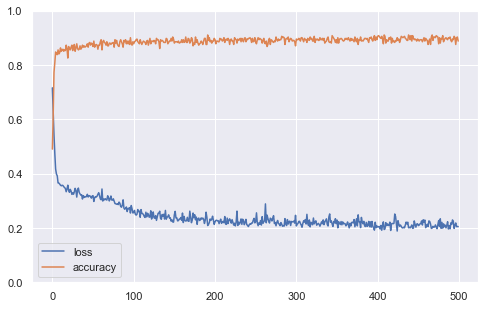

In [61]:
pd.DataFrame(model_fit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Let's show the biggest accuracy we got during training.

In [62]:
model.evaluate(X.T, Y.T)

13/13 [==============================] - 0s 693us/step - loss: 0.1890 - accuracy: 0.9100


[0.18901270627975464, 0.9100000262260437]

The value isn't the same as the one we get while implementing our own model from scratch but there is not much difference. This difference may be due to initialization or perhaps, about optimization. Anyway, it is not that important, we can easily implement all the steps with Keras easily.